In [1]:
! pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the data set
dataframe=pd.read_csv('spam.tsv', sep='\t')

In [5]:
#displays the data set
dataframe

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [6]:
#diaplays above 5 rows and columns of data using head function
dataframe.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
#length of dataframe
len(dataframe)

5572

In [8]:
#it will count how many of them are ham and how many of them are spam
dataframe['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
#show the number of missing (nan,NAN,Nan) data for each column
dataframe.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

# balancing of data

In [10]:
#it will only display the ham emails
ham=dataframe[dataframe['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [11]:
#it will only the spam emails
spam=dataframe[dataframe['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [12]:
# it will show rows and columns in each set of ham and spam
ham.shape,spam.shape

((4825, 4), (747, 4))

In [13]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [14]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [15]:
data=ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,hows my favourite person today? r u workin har...,101,4
1,ham,"Not for possession, especially not first offense",48,1
2,ham,Thanks. It was only from tescos but quite nice...,73,3
3,ham,yes baby! I need to stretch open your pussy!,44,2
4,ham,Thank you baby! I cant wait to taste the real ...,54,4
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


#Exploratory Data Analysis 

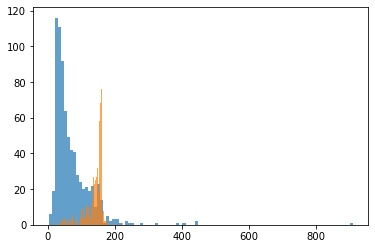

In [16]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()


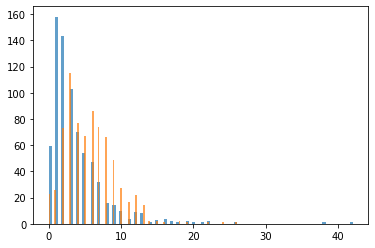

In [17]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

# DATA PREPARATION 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
#training and testing of data set
x_train, x_test, y_train,y_test=train_test_split(data['message'],data['label'], test_size=0.3,shuffle=True,stratify=data['label'])

In [21]:
x_train.shape

(1045,)

In [22]:
y_train

1367    spam
395      ham
724      ham
1375    spam
844     spam
        ... 
218      ham
4        ham
374      ham
112      ham
1472    spam
Name: label, Length: 1045, dtype: object

# BAG OF WORDS CREATION

In [23]:
vectorizer=TfidfVectorizer()

In [24]:
X_train=vectorizer.fit_transform(x_train)

In [25]:
X_train.shape

(1045, 3696)

In [27]:
X_train

<1045x3696 sparse matrix of type '<class 'numpy.float64'>'
	with 17496 stored elements in Compressed Sparse Row format>

# PIPELINE AND RF

In [28]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [29]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [30]:
y_pred=clf.predict(x_test)

In [31]:
confusion_matrix(y_test,y_pred)

array([[225,   0],
       [ 15, 209]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.9665924276169265

In [33]:
clf.predict(["Hy, Whatsup"])

array(['ham'], dtype=object)

In [34]:
clf.predict(["Lottery won of $100000"])

array(['ham'], dtype=object)

In [35]:
from sklearn.svm import SVC

In [36]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1, gamma='auto'))])

In [37]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(C=1, gamma='auto'))])

In [38]:
y_pred=clf.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[  0, 225],
       [  0, 224]], dtype=int64)

# TEST ACCURACY

In [40]:
accuracy_score(y_test,y_pred)

0.49888641425389757